In [2]:
#importing library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.metrics import classification_report,confusion_matrix

In [4]:
tf.random.set_seed(100)

In [5]:
#loading the dataset
df=pd.read_csv('../input/120-years-of-olympic-history-athletes-and-results/athlete_events.csv')
#loading the dataset
df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


In [6]:
#getting information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [7]:
df['Medal'].unique()

array([nan, 'Gold', 'Bronze', 'Silver'], dtype=object)

In [10]:
#converting the metal column to binary
df['Medal']=df['Medal'].apply(lambda x:1 if str(x)!='nan' else 0)

# Cleaning the Dataset

In [11]:
#dropping the unnecessary column
df=df.drop(['ID','Name','Games'],axis=1)

In [14]:

df.isna().mean()

Sex       0.000000
Age       0.034944
Height    0.221938
Weight    0.231912
Team      0.000000
NOC       0.000000
Year      0.000000
Season    0.000000
City      0.000000
Sport     0.000000
Event     0.000000
Medal     0.000000
dtype: float64

In [19]:
df.groupby(['Medal','Sex'])['Age'].mean()

Medal  Sex
0      F      23.594127
       M      26.239318
1      F      24.509167
       M      26.497178
Name: Age, dtype: float64

In [20]:
for column in ['Age','Height','Weight']:
    df[column]=df.groupby(['Medal','Sex'])[column].apply(lambda x:x.fillna(x.mean()))

In [21]:
print('Total Missing Values',df.isna().sum().sum())

Total Missing Values 0


# Encoding

In [23]:
{column: len(df[column].unique()) for column in df.select_dtypes('object').columns}

{'Sex': 2,
 'Team': 1184,
 'NOC': 230,
 'Season': 2,
 'City': 42,
 'Sport': 66,
 'Event': 765}

In [32]:
def binary_encode(df,columns,positive_values):
    #copy the dataframe
    df=df.copy()
    #looping the column and respective positive values
    for column,positive_value in zip(columns,positive_values):
        #appling the lambda function to convert the into binary column
        
        df[column]=df[column].apply(lambda x:1 if x==positive_value else 0)
    return df
    

    


In [28]:
def onehot_encode(df,columns,prefixes):
    df=df.copy()
    for column,prefix in zip(columns,prefixes):
        dummies=pd.get_dummies(df[column],prefix=prefix)
        df=pd.concat([df,dummies],axis=1)
        #dropping
        df=df.drop(column,axis=1)
    #returning the dataframe
    return df

In [33]:
df=binary_encode(
    df,
    columns=['Sex','Season'],
    positive_values=['M','Summer'])

In [35]:
#onehot_encode
df=onehot_encode(
    df,
    columns=['Team','NOC','City','Sport','Event'],
    prefixes=['T','N','C','S','E'])

In [36]:
df

,Sex,Age,Height,Weight,Year,Season,Medal,T_30. Februar,T_A North American Team,T_Acipactli,...,"E_Wrestling Men's Super-Heavyweight, Greco-Roman","E_Wrestling Men's Unlimited Class, Greco-Roman","E_Wrestling Men's Welterweight, Freestyle","E_Wrestling Men's Welterweight, Greco-Roman","E_Wrestling Women's Featherweight, Freestyle","E_Wrestling Women's Flyweight, Freestyle","E_Wrestling Women's Heavyweight, Freestyle","E_Wrestling Women's Light-Heavyweight, Freestyle","E_Wrestling Women's Lightweight, Freestyle","E_Wrestling Women's Middleweight, Freestyle"
0,1,24.0,180.000000,80.000000,1992,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,23.0,170.000000,60.000000,2012,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,24.0,178.473681,75.170519,1920,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,34.0,181.156113,79.203782,1900,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,21.0,185.000000,82.000000,1988,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,1,29.0,179.000000,89.000000,1976,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
271112,1,27.0,176.000000,59.000000,2014,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
271113,1,27.0,176.000000,59.000000,2014,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
271114,1,30.0,185.000000,96.000000,1998,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
 print('Remaining non_numeric columns:',len(df.select_dtypes('object').columns))

Remaining non_numeric columns: 0


# Visualization Columns

<AxesSubplot:>

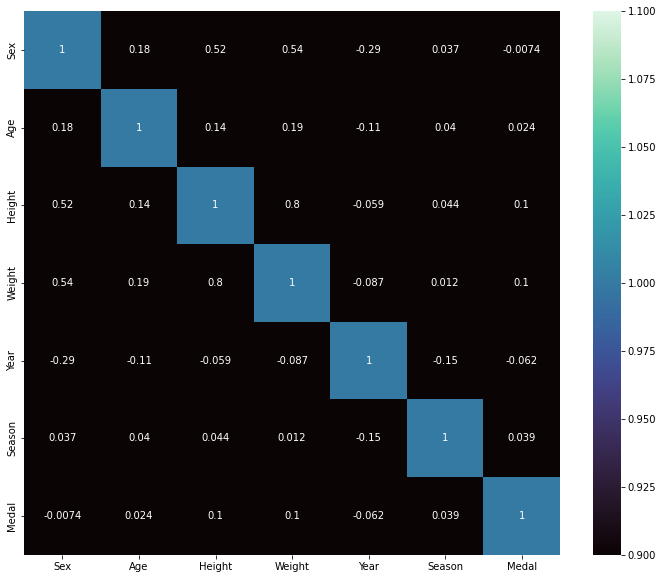

In [44]:
#getting correlation matrix
corr=df.loc[:,:'Medal'].corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr,annot=True,vmin=1.0,cmap='mako')

In [45]:
#Splitting and Scaling the dataset
df

,Sex,Age,Height,Weight,Year,Season,Medal,T_30. Februar,T_A North American Team,T_Acipactli,...,"E_Wrestling Men's Super-Heavyweight, Greco-Roman","E_Wrestling Men's Unlimited Class, Greco-Roman","E_Wrestling Men's Welterweight, Freestyle","E_Wrestling Men's Welterweight, Greco-Roman","E_Wrestling Women's Featherweight, Freestyle","E_Wrestling Women's Flyweight, Freestyle","E_Wrestling Women's Heavyweight, Freestyle","E_Wrestling Women's Light-Heavyweight, Freestyle","E_Wrestling Women's Lightweight, Freestyle","E_Wrestling Women's Middleweight, Freestyle"
0,1,24.0,180.000000,80.000000,1992,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,23.0,170.000000,60.000000,2012,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,24.0,178.473681,75.170519,1920,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,34.0,181.156113,79.203782,1900,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,21.0,185.000000,82.000000,1988,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,1,29.0,179.000000,89.000000,1976,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
271112,1,27.0,176.000000,59.000000,2014,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
271113,1,27.0,176.000000,59.000000,2014,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
271114,1,30.0,185.000000,96.000000,1998,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
#Splitting the dataset into x and y
y=df['Medal'].copy()
x=df.drop('Medal',axis=1)

In [47]:
scaler=StandardScaler()
x=scaler.fit_transform(x)

In [48]:
#train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=100)

In [49]:
x.shape

(271116, 2293)

In [50]:
inputs=tf.keras.Input(shape=(x.shape[1]))
x=tf.keras.layers.Dense(64,activation='relu')(inputs)
x=tf.keras.layers.Dense(64,activation='relu')(x)
outputs=tf.keras.layers.Dense(1,activation='sigmoid')(x)

2022-05-06 03:08:08.976731: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [51]:
model=tf.keras.Model(inputs,outputs)
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy',tf.keras.metrics.AUC(name='auc')])

In [52]:
history=model.fit(
    x_train,
    y_train,
    validation_split=0.2,
    batch_size=32,
    epochs=100,
    callbacks=[tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=3,
        restore_best_weights=True)])

2022-05-06 03:11:55.585228: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
4745/4745 [==============================] - 21s 4ms/step - loss: 0.3315 - accuracy: 0.8719 - auc: 0.8061 - val_loss: 0.2986 - val_accuracy: 0.8849 - val_auc: 0.8430
Epoch 2/100
4745/4745 [==============================] - 18s 4ms/step - loss: 0.2768 - accuracy: 0.8922 - auc: 0.8700 - val_loss: 0.2779 - val_accuracy: 0.8955 - val_auc: 0.8656
Epoch 3/100
4745/4745 [==============================] - 19s 4ms/step - loss: 0.2487 - accuracy: 0.9038 - auc: 0.8971 - val_loss: 0.2682 - val_accuracy: 0.9016 - val_auc: 0.8771
Epoch 4/100
4745/4745 [==============================] - 18s 4ms/step - loss: 0.2268 - accuracy: 0.9126 - auc: 0.9158 - val_loss: 0.2578 - val_accuracy: 0.9078 - val_auc: 0.8858
Epoch 5/100
4745/4745 [==============================] - 19s 4ms/step - loss: 0.2093 - accuracy: 0.9201 - auc: 0.9285 - val_loss: 0.2497 - val_accuracy: 0.9122 - val_auc: 0.8916
Epoch 6/100
4745/4745 [==============================] - 17s 4ms/step - loss: 0.1938 - accuracy: 0.9249 - auc:

In [53]:
model.evaluate(x_test,y_test)

2542/2542 [==============================] - 5s 2ms/step - loss: 0.2480 - accuracy: 0.9145 - auc: 0.8948


[0.24795089662075043, 0.9145263433456421, 0.8948172926902771]

In [57]:
y_true=np.array(y_test)
y_pred=np.squeeze(np.array(model.predict(x_test)>=0.5,dtype=np.int))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [59]:
print('Classification Report',classification_report(y_true,y_pred))

Classification Report               precision    recall  f1-score   support

           0       0.92      0.98      0.95     69458
           1       0.82      0.53      0.64     11877

    accuracy                           0.91     81335
   macro avg       0.87      0.75      0.80     81335
weighted avg       0.91      0.91      0.91     81335



In [61]:
#Confusion Matrix
print('Confusion Matrix',confusion_matrix(y_true,y_pred))

Confusion Matrix [[68121  1337]
 [ 5615  6262]]
